In [2]:
input_str=input("意味類似度ネットワークを作りたい単語を入力してください===>")

In [3]:
from gensim.models import Word2Vec

# 学習済みモデルのロード
model_file_path = '../003_research_Word2Vec/KITERETU/gw2v160.model'
model = Word2Vec.load(model_file_path)

In [11]:
# モデル内に登録されている単語リストの長さをlen関数で見る（＝単語数）
print(len(model.wv.key_to_index))

# 「群馬」に似ている単語TOP7を書き出す
out = model.wv.most_similar(positive=[input_str], topn=3)
print(out)

293753
[('群馬県', 0.7760874032974243), ('栃木', 0.7456161379814148), ('前橋', 0.7389767169952393)]


In [16]:
print(out)

#AtCoderでよく使う辞書処理を使って県と数値を取り出す
pre=[]
pre.append(input_str)
for prefecture, value in out:
    print(prefecture, value)
    pre.append(prefecture)

[('群馬県', 0.7760874032974243), ('栃木', 0.7456161379814148), ('前橋', 0.7389767169952393)]
群馬県 0.7760874032974243
栃木 0.7456161379814148
前橋 0.7389767169952393


実装方式に教授の考え方をそのまま応用<br>

それぞれのネットワーク的な接続を数値で表す。<br>
表し方としては、2次元配列を用いる<br>

In [17]:
import pandas as pd

df = pd.crosstab(pre, pre, rownames=['X'], colnames=['Y'])
df

Y,前橋,栃木,群馬,群馬県
X,,,,
前橋,1,0,0,0
栃木,0,1,0,0
群馬,0,0,1,0
群馬県,0,0,0,1


In [20]:
for i in pre:
    for j in pre:
        #0を除外する処理を入れていないので計算数がその分多い
        if model.wv.similarity(i,j) >= 1.0:
            df.loc[i,j]=0.0
        elif model.wv.similarity(i,j) >= 0.6:
            df.loc[i,j]=model.wv.similarity(i,j)
        else:
            df.loc[i,j]=0
        #print(df.loc['Bob', 'age'])
        #df.iloc[1,0]
df

Y,前橋,栃木,群馬,群馬県
X,,,,
前橋,0.000000,0.604361,0.738977,0.000000
栃木,0.604361,0.000000,0.745616,0.000000
群馬,0.738977,0.745616,0.000000,0.776087
群馬県,0.000000,0.000000,0.776087,0.000000


In [ ]:
!pip install japanize_matplotlib
!pip install seaborn

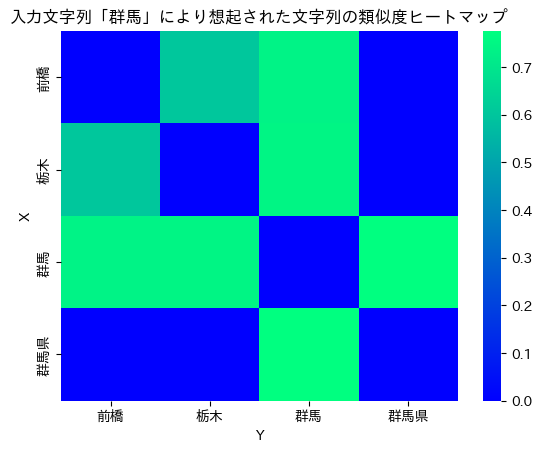

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib


plt.figure()
plt.title("入力文字列「{}」により想起された文字列の類似度ヒートマップ".format(input_str))
sns.heatmap(df,cmap="winter")
plt.savefig('eaborn_heatmap_dataframe.png')

In [23]:
!pip install networkx

c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26627 (\N{CJK UNIFIED IDEOGRAPH-6803}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  fig.canvas.print_figure(b

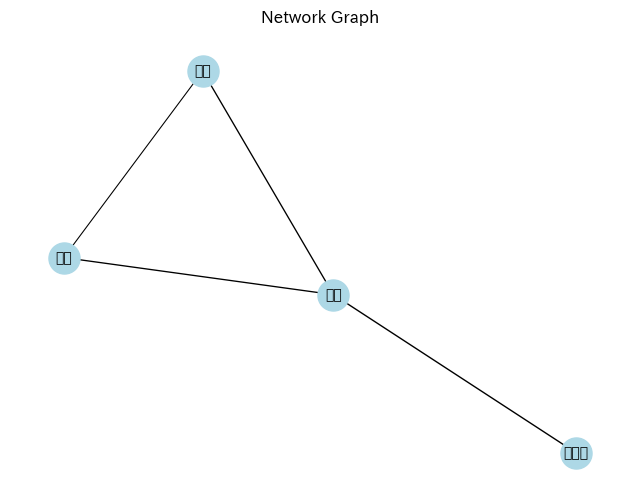

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib


# データフレームを作成
data = {
    'Y': ['前橋', '栃木', '群馬', '群馬県'],
    '前橋': [0.000000, 0.604361, 0.738977, 0.000000],
    '栃木': [0.604361, 0.000000, 0.745616, 0.000000],
    '群馬': [0.738977, 0.745616, 0.000000, 0.776087],
    '群馬県': [0.000000, 0.000000, 0.776087, 0.000000]
}

df = pd.DataFrame(data, columns=['Y', '前橋', '栃木', '群馬', '群馬県'])
df.set_index('Y', inplace=True)

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')
weights_normalized = [weight / max(weights.values()) for weight in weights.values()]

# グラフを描画
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=weights_normalized, edge_color='black')
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10)
plt.title('Network Graph')
plt.axis('off')
plt.show()


c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26627 (\N{CJK UNIFIED IDEOGRAPH-6803}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  fig.canvas.print_figure(b

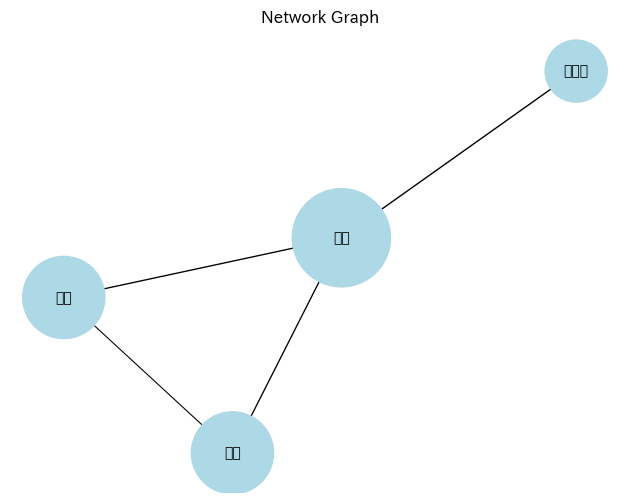

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

# データフレームを作成
data = {
    'Y': ['前橋', '栃木', '群馬', '群馬県'],
    '前橋': [0.000000, 0.604361, 0.738977, 0.000000],
    '栃木': [0.604361, 0.000000, 0.745616, 0.000000],
    '群馬': [0.738977, 0.745616, 0.000000, 0.776087],
    '群馬県': [0.000000, 0.000000, 0.776087, 0.000000]
}

df = pd.DataFrame(data, columns=['Y', '前橋', '栃木', '群馬', '群馬県'])
df.set_index('Y', inplace=True)

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')
weights_normalized = [weight / max(weights.values()) for weight in weights.values()]

# ノードの太さを重みに応じて調整
node_sizes = [500 + 1500 * G.degree(node) for node in G.nodes()]

# グラフを描画
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=weights_normalized, edge_color='black')
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10)
plt.title('Network Graph')
plt.axis('off')
plt.show()


c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26627 (\N{CJK UNIFIED IDEOGRAPH-6803}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  fig.canvas.print_figure(b

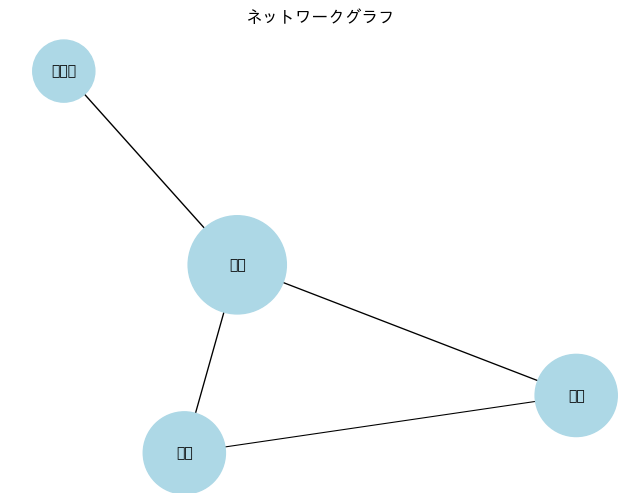

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

# データフレームを作成
data = {
    'Y': ['前橋', '栃木', '群馬', '群馬県'],
    '前橋': [0.000000, 0.604361, 0.738977, 0.000000],
    '栃木': [0.604361, 0.000000, 0.745616, 0.000000],
    '群馬': [0.738977, 0.745616, 0.000000, 0.776087],
    '群馬県': [0.000000, 0.000000, 0.776087, 0.000000]
}

df = pd.DataFrame(data, columns=['Y', '前橋', '栃木', '群馬', '群馬県'])
df.set_index('Y', inplace=True)

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')
weights_normalized = [weight / max(weights.values()) for weight in weights.values()]

# ノードの太さを重みに応じて調整
node_sizes = [500 + 1500 * G.degree(node) for node in G.nodes()]

# グラフを描画
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=weights_normalized, edge_color='black')
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10)
plt.title('ネットワークグラフ')
plt.axis('off')
plt.show()


c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26627 (\N{CJK UNIFIED IDEOGRAPH-6803}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  fig.canvas.print_figure(b

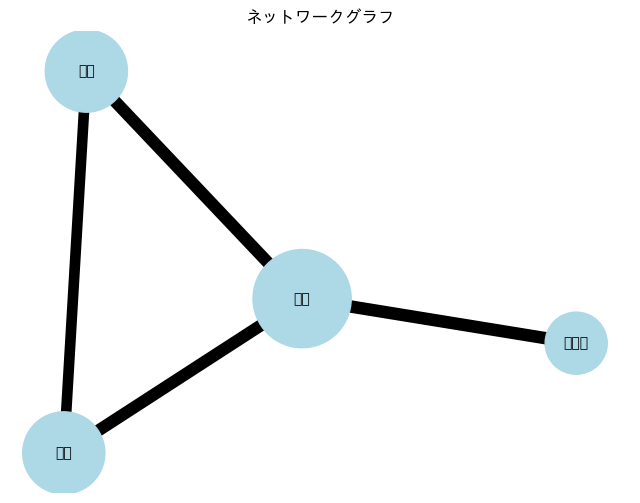

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

# データフレームを作成
data = {
    'Y': ['前橋', '栃木', '群馬', '群馬県'],
    '前橋': [0.000000, 0.604361, 0.738977, 0.000000],
    '栃木': [0.604361, 0.000000, 0.745616, 0.000000],
    '群馬': [0.738977, 0.745616, 0.000000, 0.776087],
    '群馬県': [0.000000, 0.000000, 0.776087, 0.000000]
}

df = pd.DataFrame(data, columns=['Y', '前橋', '栃木', '群馬', '群馬県'])
df.set_index('Y', inplace=True)

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')

# 辺の太さを重みに応じて調整
max_weight = max(weights.values())
edge_widths = [3 + 6 * weights[edge] / max_weight for edge in G.edges()]

# ノードの太さを重みに応じて調整
node_sizes = [500 + 1500 * G.degree(node) for node in G.nodes()]

# グラフを描画
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black')
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10)
plt.title('ネットワークグラフ')
plt.axis('off')
plt.show()


c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26627 (\N{CJK UNIFIED IDEOGRAPH-6803}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IRSL27\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  fig.canvas.print_figure(b

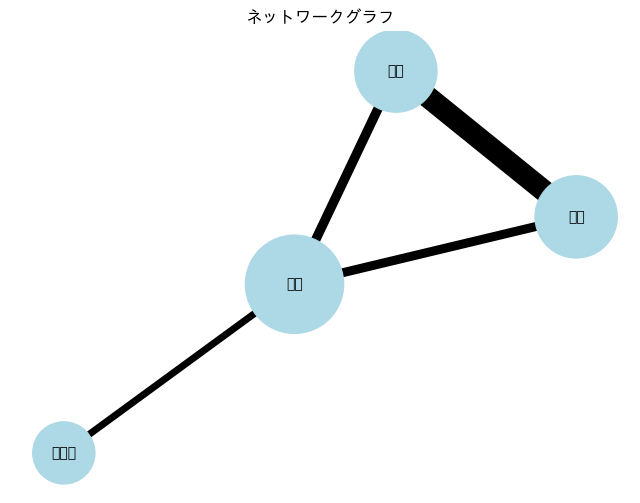

In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

# データフレームを作成
data = {
    'Y': ['前橋', '栃木', '群馬', '群馬県'],
    '前橋': [0.000000, 0.604361, 0.738977, 0.000000],
    '栃木': [0.604361, 0.000000, 0.745616, 0.000000],
    '群馬': [0.738977, 0.745616, 0.000000, 0.776087],
    '群馬県': [0.000000, 0.000000, 0.776087, 0.000000]
}

df = pd.DataFrame(data, columns=['Y', '前橋', '栃木', '群馬', '群馬県'])
df.set_index('Y', inplace=True)

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')

# 辺の太さを重みに応じて調整
max_weight = max(weights.values())
#edge_widths = [1 + 4 * (1 - weights[edge]) for edge in G.edges()]
edge_widths = [(10 * (1 - weights[edge]))**2 for edge in G.edges()]


# ノードの太さを重みに応じて調整
node_sizes = [500 + 1500 * G.degree(node) for node in G.nodes()]

# グラフを描画
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black')
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10)
plt.title('ネットワークグラフ')
plt.axis('off')
plt.show()


意味類似性ネットワークの生成は上記のプログラムを採択

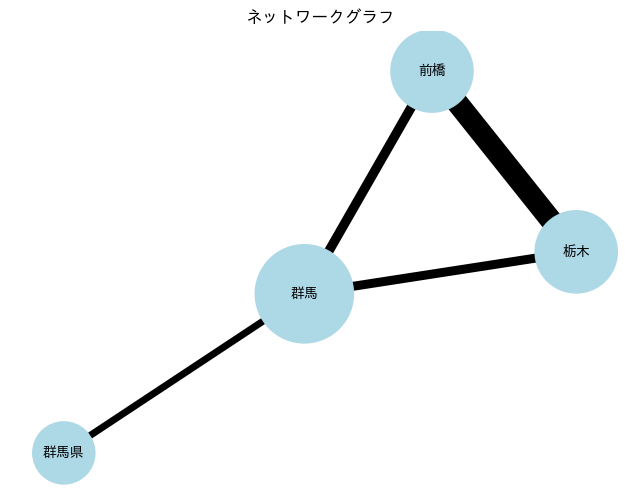

In [49]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

# データフレームを作成
data = {
    'Y': ['前橋', '栃木', '群馬', '群馬県'],
    '前橋': [0.000000, 0.604361, 0.738977, 0.000000],
    '栃木': [0.604361, 0.000000, 0.745616, 0.000000],
    '群馬': [0.738977, 0.745616, 0.000000, 0.776087],
    '群馬県': [0.000000, 0.000000, 0.776087, 0.000000]
}

df = pd.DataFrame(data, columns=['Y', '前橋', '栃木', '群馬', '群馬県'])
df.set_index('Y', inplace=True)

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')

# 辺の太さを重みに応じて調整
max_weight = max(weights.values())
edge_widths = [(10 * (1 - weights[edge])) ** 2 for edge in G.edges()]

# ノードの太さを重みに応じて調整
node_sizes = [500 + 1500 * G.degree(node) for node in G.nodes()]

# グラフを描画
japanize_matplotlib.japanize()
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black')
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_color='black', font_size=10)
plt.title('ネットワークグラフ')
plt.axis('off')
plt.show()
